# Data Exploration

Import các thư viện cần thiết

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Đọc dữ liệu từ file `Data/2019.csv`

In [24]:
DATA_PATH = 'Data/2019.csv'

data = pd.read_csv(DATA_PATH)
print("Shape: ", data.shape)
data.head()

Shape:  (156, 9)


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


➡️ **Nhận xét**: 

- Dữ liệu có 156 dòng và 9 cột.

- Mỗi dòng tượng trưng cho một quốc gia / khu vực và các thông tin liên quan như là thứ hạng của nó xét theo điểm số hạnh phúc trên thế giới (Overall rank), tên cụ thể của nó (Country or region), GDP bình quân đầu người (GDP per capita), ...

- Kích thước dữ liệu: 8,822 bytes.

Số giá trị duy nhất của cột `Country or region`:

In [25]:
print("Số lượng các quốc gia / khu vực duy nhất: ", data['Country or region'].nunique())

Số lượng các quốc gia / khu vực duy nhất:  156


➡️ **Nhận xét**: 

- Số tên quốc gia / khu vực duy nhất bằng với số dòng dữ liệu → không có dòng dữ liệu trùng.

Dữ liệu có các cột nào và ý nghĩa từng cột là gì?

In [26]:
data.columns.tolist()

['Overall rank',
 'Country or region',
 'Score',
 'GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

➡️ **Nhận xét**: 

- Ý nghĩa của từng đặc trưng:

    - Overall rank (Xếp hạng tổng thể): Thứ hạng của quốc gia / khu vực dựa trên điểm số hạnh phúc.

    - Country or region (Quốc gia hoặc khu vực): Tên của quốc gia được khảo sát.

    - Score (Điểm số - Quan trọng nhất): Điểm hạnh phúc trung bình (thường từ 0 đến 10). Đây là biến mục tiêu (Target Variable) muốn phân tích hay dự đoán.

    - GDP per capita (GDP bình quân đầu người): Mức độ đóng góp của kinh tế vào điểm hạnh phúc. Đây không phải là số tiền GDP thực tế mà là điểm số đã được quy đổi.

    - Social support (Hỗ trợ xã hội): Điểm số phản ánh việc người dân cảm thấy họ có người để dựa vào khi gặp khó khăn hay không.

    - Healthy life expectancy (Kỳ vọng sống khỏe mạnh): Điểm số dựa trên tuổi thọ trung bình và tình trạng sức khỏe của người dân.

    - Freedom to make life choices (Quyền tự do lựa chọn): Mức độ hài lòng của người dân về quyền tự do quyết định cuộc sống của mình.

    - Generosity (Sự hào phóng, rộng lượng): Điểm số dựa trên các hoạt động từ thiện, giúp đỡ người khác.

    - Perceptions of corruption (Nhận thức về tham nhũng): Mức độ người dân cảm thấy chính phủ hoặc doanh nghiệp trong nước có tham nhũng hay không.

Ma trận tương quan thể hiện mối quan hệ giữa các cột số với điểm hạnh phúc `Score` và Heat map thể hiện mối quan hệ giữa các biến số


Mức độ ảnh hưởng đến điểm Hạnh phúc (Score):
Score                           1.000000
GDP per capita                  0.793883
Healthy life expectancy         0.779883
Social support                  0.777058
Freedom to make life choices    0.566742
Perceptions of corruption       0.385613
Generosity                      0.075824
Overall rank                   -0.989096
Name: Score, dtype: float64


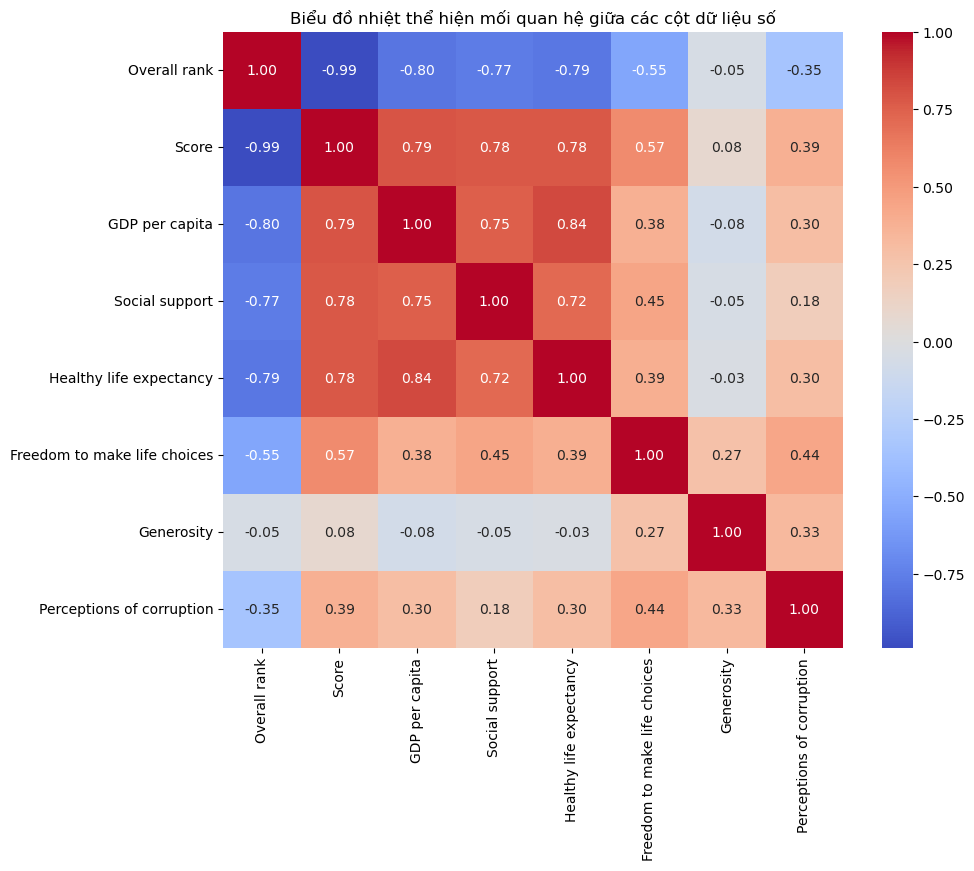

In [29]:
# Chọn các cột số (loại bỏ tên quốc gia)
numeric_cols = data.select_dtypes(include=['float64', 'int64'])

# Tính ma trận tương quan
correlation = numeric_cols.corr()

# Mức độ ảnh hưởng của các cột tới 'Score'
print("\nMức độ ảnh hưởng đến điểm Hạnh phúc (Score):")
print(correlation['Score'].sort_values(ascending=False))

# 4. Trực quan hóa (Vẽ Heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Biểu đồ nhiệt thể hiện mối quan hệ giữa các cột dữ liệu số')
plt.show()

➡️ **Nhận xét**: 

- Dựa vào Ma trận tương quan (Correlation Matrix), các cột sau có tiềm năng lớn nhất vì chúng ảnh hưởng mạnh đến điểm Hạnh phúc (Score):

    - Nhóm ảnh hưởng rất mạnh (Correlation > 0.7):

        - GDP per capita (0.79): Kinh tế là yếu tố quan trọng nhất. Nước càng giàu, dân càng hạnh phúc.

        - Healthy life expectancy (0.78): Sức khỏe đi đôi với hạnh phúc.

        - Social support (0.77): Các mối quan hệ xã hội cực kỳ quan trọng.

        -> Ý nghĩa: Đây là 3 "trụ cột" chính khi xây dựng mô hình dự đoán hạnh phúc.

    - Nhóm ảnh hưởng trung bình:

        - Freedom to make life choices (0.57): Quyền tự do cũng đóng góp đáng kể.

    - Nhóm ảnh hưởng thấp/Bất ngờ:

        - Generosity (0.07): Rất thấp. Điều này cho thấy sự hào phóng không nhất thiết dẫn đến điểm hạnh phúc quốc gia cao hơn (hoặc dữ liệu không phản ánh rõ ràng).

- Khi xử lí dữ liệu cần bỏ đi cột `Overall rank` vì:

    - Đây là hiện tượng "Data Leakage" (Rò rỉ dữ liệu). `Overall rank` thực chất là một phiên bản khác của `Score` (Điểm cao thì thứ hạng cao).

    - Nếu dùng `Overall rank` để dự đoán `Score`, mô hình sẽ cho hiện tượng quá khớp `Overfitting`.

    - Có thể thấy trong Heat map đã vẽ ở trên, độ tương quan giữa `Overall rank` và `Score`là -0.99 (gần như tuyệt đối), chứng tỏ chúng là một.

Kiểu dữ liệu của các cột là gì?

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


➡️ **Nhận xét**: 

- `Overall rank`: int64 (Số nguyên - Integer).

- `Country or region`: object → Cần ép kiểu về `string`.

- Các cột còn lại (`Score`, `GDP per capita`, `Social support`, `Healthy life expectancy`, `Freedom to make life choices`, `Generosity`, `Perceptions of corruption`): float64 (Số thực - Floating point numbers).